
<div style="text-align:left;font-size: 0.8em; color: #444;line-height: 0.9;font-family: Palatino;">  
<strong>NOTE:</strong>  This notebook, provided under the terms of the MIT licensing, demonstrates the usage of bioinformatics functions for differential analsyis of regulatory sequences. For the most up-to-date version of this document please visit <a href="https://github.com/psaisan/PEAKDIFF"> github.com/psaisan/PEAKDIFF</a>. If you still have questions, contact saisan@berkeley.edu.
<hr>
</div>
<div style="background-color: #FFE; border: 1px solid #333333; padding: 10px; font-size: 0.80em; font-family: 'Libre Baskerville', serif; text-align: left;">
 
<h1>
PEAKDIFF: Differential Peak Analysis of H3K27ac ChIP-seq signal intensity around distal ATAC-seq peaks in Healthy vs. Diseased Kupffer Cells</h1>    
</div>

<br>   

As outlined in  <a href="https://pubmed.ncbi.nlm.nih.gov/32362324/"> Seidman et al</a>, we utilized transcriptomic data  <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128338"> (GSE128338)</a> associated with Fig. 5B to define putative distal regulatory elements. We achieved this by using ATAC-seq to detect open chromatin regions and annotating these regions with Histone H3K27 acetylation (H3K27ac) data obtained from ChIP-seq within a 1,000 base pair window. The Kupffer cells were isolated from two groups of mice: healthy controls and mice fed a diet that induces metabolic dysfunction-associated hepatosteatosis (MASH). Our analysis revealed 3,717 regions with more than a two-fold increase in H3K27ac and 2,678 regions with more than a two-fold decrease in acetylation in the Kupffer cells from MASH-induced mice compared to healthy controls, with all changes being statistically significant (FDR < 0.05). These findings suggest significant alterations in histone acetylation associated with a MASH-inducing diet, highlighting potential regulatory changes linked to metabolic dysfunction in hepatosteatosis.

<table style="width:100%; border:0; border-collapse: collapse;">
  <tr>
     <td style="width:50%; text-align: center; background-color: #ffffff; padding: 15px;">
        <img src="../Images/peakScatter.png" alt="Image 1" style="width:100%; max-width:400px;">
    </td>
        <td style="width:50%; text-align: center; background-color: #ffffff; padding: 15px;">
      <img src="../Images/histogram.png" alt="Image 2" style="width:100%; max-width:400px;">
    </td>
  </tr>
</table>
<br>
 

In [132]:
#%run -i /bioinformatics/Glasslib/GlassTools.py

Group1='MASH'
Group2='HEALTHY'
baseDir='/home/psaisan/MCAT/'


# Input File: ATAC PEAKS Combined from HEALTHY and MASH cells
C57_ATAC_KCHN=baseDir+"/data/ATAC_Kupffer_HEALTHY_and_MASH_Peaks_200bp.txt"

# Output ehancer peak FILE Names for after being loaded H3k27ac ChIP Tags
h3k_KCH_KCN_tags_2000=baseDir+'data/KC-H_KC_N_H3k27ac_at_peaks_w2000.txt'
h3k_KCH_KCN_tags_1000=baseDir+'data/KC-H_KC_N_H3k27ac_at_peaks_w1000.txt' 


# ChIP-Seq Replicates for HEALTHY cells
KC_H_Rep1=baseDir+"/data/ChIP_HEALTHY_Rep1"
KC_H_Rep2=baseDir+"/data/ChIP_HEALTHY_Rep2"

# ChIP-Seq Replicates for HEALTHY cells
KC_N_Rep1=baseDir+"/data/ChIP_MASH_Rep1"
KC_N_Rep2=baseDir+"/data/ChIP_MASH_Rep2"

 
# LOAD ATAC PEAKS with H3K27ac ChIP-tags from HEALTHY and MASH ChIPs using HOMER's annotatePeaks
!annotatePeaks.pl $C57_ATAC_KCHN mm10 -d $KC_H_Rep1 $KC_H_Rep2 $KC_N_Rep1 $KC_N_Rep2 -size 1000 > $h3k_KCH_KCN_tags_1000\


	Peak file = data/ATAC_Kupffer_HEALTHY_and_MASH_Peaks_200bp.txt
	Genome = mm10
	Organism = mouse
	Tag Directories:
		/ata/ChIP_HEALTHY_Rep1
		data/ChIP_HEALTHY_Rep2
		data/ChIP_MASH_Rep1
		data/ChIP_MASH_Rep2
	Peak Region set to 1000
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 70300
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 70300
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------
	Finding Closest TSS...
	Annotating:........................
		Annotation	Number of peaks	Total size (bp)	Log2 Ratio (obs/exp)	LogP enrichment (+values depleted)
		3UTR	788.0	20049228	0.606	-64.423
		miRNA	1.0	24864	0.639	-0.747
		ncRNA	240.0	3372538	1.462	-93.748
		TTS	1201.0	27011103

In [133]:
# 3
#######################
#
# Calculate differentially acetylated regions using DESeq2 via 'getDiffExpression.pl' (FC > 2, p-adj < 0.05). 
# H3K27ac ChIP-seq signal around distal ATAC-seq peaks in a 1,000 bp window. 
# Regions overlapping with KC signature enhancers are colored green. 
# Enhancers (peaks) with more acetylation during NASH are colored red
# Enhancers (peaks) less acetylation during NASH are colored blue. 
# 
# Define Input and output file names for getDiffExpression(infile,outfile)
#
 

input_file_wtwtkoko=h3k_KCH_KCN_tags_1000
output_file_getDiffExp='/home/psaisan/MCAT/h3K_tags_khkh_knkn_w1000.txt' #      '~/PEAKS/hoxb8_ATAC_diff_h3k27ac_peaks_wtwt_koko1.txt'

cmd = 'getDiffExpression.pl {infile} WT WT KO KO -log2fold 1 -raw > {outfile}'.format(infile=input_file_wtwtkoko,outfile=output_file_getDiffExp)
printr(cmd) 

!$cmd



getDiffExpression.pl /home/psaisan/MCAT/KC-H_KC_N_H3k27ac_at_peaks_w1000.txt WT WT KO KO -log2fold 1 -raw > /home/psaisan/MCAT/h3K_tags_khkh_knkn_w1000.txt
	Autodetecting input file format...
	Autodetected annotatePeaks.pl file
	Will report raw counts in output table (no normalization)


	Using DESeq2 to calculate differential expression/enrichment...
	Output Stats WT vs. KO:
		Total Genes: 70300
		Total Up-regulated in KO vs. WT: 3717 (5.287%) [log2fold>1, FDR<0.05]
		Total Dn-regulated in KO vs. WT: 2678 (3.809%) [log2fold<-1, FDR<0.05]



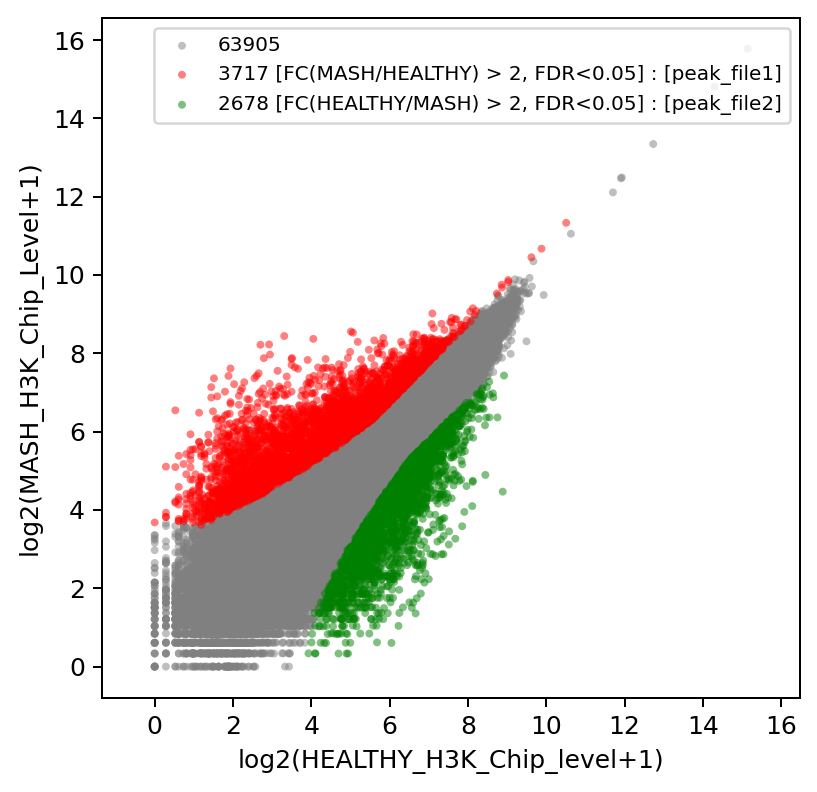

In [144]:
#######################
# 7
#######################

# Read getDiffExpression outfile, Define Normal HEALTHY vs Altered MASH conditions, 
# PLOT scatter seperable segments

# Uncomment below to read df and df_scatter:
df2       =   pd.read_csv(getDiffExp_outfile,sep='\t')

 
FC_Col=23 # Fold change olumn
WT_Col=19 # HEALTHY H327Kac column1
KO_Col=21 # MASH H327Kac column1
p_val_Col=25 # P-Value column


# fdata =  is Log2FoldChange WT/KO or KO/WT
fdata = df2.iloc[:, FC_Col]
fdata = pd.to_numeric(fdata, errors='coerce')

pdata = df2.iloc[:, p_val_Col]
pdata = pd.to_numeric(pdata, errors='coerce')



# Define the 3 conditions for segmentation of enhancers (peaks)
cond1=(fdata >=  1) & (pdata < 0.05)  # (Log2FC  > 1 ) means MASH H3k27ac level >= HEALTHY H3k27ac level
cond2=(fdata <= -1) & (pdata < 0.05)  # (Log2FC  < -1 ) means MASH H3k27ac level <= HEALTHY H3k27ac level
cond3 = ~(cond1 | cond2)




# Extrac H3K27AC densities for MASH assuming 2 columns -otherwise you need to modify below
ydata = (df2.iloc[:, KO_Col]+df2.iloc[:, KO_Col+1])/2  # Replace 2 with the desired column index
ydata = pd.to_numeric(ydata, errors='coerce')


# Extrac H3K27AC densities for HEALTHY assuming 2 columns -otherwise you need to modify below
xdata = (df2.iloc[:, WT_Col]+ df2.iloc[:, WT_Col+1])/2 # Replace 2 with the desired column index
xdata = pd.to_numeric(xdata, errors='coerce')
 


# Plot H3K27AC Tag density as a function of distance to peak-center for KO and WT
plt.figure(figsize=(5, 5), dpi=180)

# Plot condition 3 : grey  
plt.scatter(
    np.log2(1 + xdata[cond3]),
    np.log2(ydata[cond3] + 1),
    color=[0.5,0.5,0.5],
    alpha=0.5,  # Set transparency to 50%
    label=f"{len(xdata[cond3])}",
    edgecolors='none',  # Remove edge colors for better blending
    s=10  # Adjust marker size as needed
)


# Plot condition 1 : red  
plt.scatter(
    np.log2(1 + xdata[cond1]),
    np.log2(ydata[cond1] + 1),
    color='r',  # Changed from 'c' to 'color'
    alpha=0.5,  # Set transparency to 50%
    label=f"{len(xdata[cond1])} [FC({Group1}/{Group2}) > 2, FDR<0.05] : [peak_file1]",
    edgecolors='none',
    s=10
)

# Plot condition 2 with green 
plt.scatter(
    np.log2(1 + xdata[cond2]),
    np.log2(ydata[cond2] + 1),
    color='g',  # Changed from 'c' to 'color'
    alpha=0.5,  # Set transparency to 50%
    label=f"{len(xdata[cond2])} [FC({Group2}/{Group1}) > 2, FDR<0.05] : [peak_file2]",
    edgecolors='none',
    s=10
)







plt.xlabel(f'log2({Group2}_H3K_Chip_level+1)')  # KCH -> Group2
plt.ylabel(f'log2({Group1}_H3K_Chip_Level+1)')  # KCN -> Group1

plt.xlim(0,7)
plt.ylim(0,7)
plt.axis('equal')


plt.legend(fontsize=8)
plt.show()

In [149]:
# 8
#############################
# SAVE cond1 and cond2 Peaks - we are going to look at 
# histograms Tag density as functino of distance from peak center

cond1_file=baseDir+f'./results/ATAC_diff_h3k27ac_peaks_UP_{Group1}.txt'
cond2_file=baseDir+f'./results/ATAC_diff_h3k27ac_peaks_UP_{Group2}.txt'
df2[cond1].to_csv(cond1_file, sep='\t', index=False)
df2[cond2].to_csv(cond2_file, sep='\t', index=False)


In [156]:
# 9
#############################

# NOW Create/plot peaks within a sub-segment defined by a specific condition
# Using HOMER's annotatePeaks -hist function

# Define histogram output table files
cond1_file_HIST = f'{baseDir}/results/HISTOGRAM_ATAC_diff_h3k27ac_peaks_UP_{Group1}.txt'
cond2_file_HIST = f'{baseDir}/results/HISTOGRAM_ATAC_diff_h3k27ac_peaks_UP_{Group2}.txt'

# Define inputs dynamically using exec() (not the best practice, but you're asking for it)
exec(f'tag_{Group1} = KC_H_Rep1')  # Creates tag_MASH = 'KC_H_Rep1'
exec(f'tag_{Group2} = KC_N_Rep1')  # Creates tag_HEALTHY = 'KC_N_Rep1'

# Now retrieve the dynamically created variables
tag1 = eval(f'tag_{Group1}')  # Equivalent to tag_MASH
tag2 = eval(f'tag_{Group2}')  # Equivalent to tag_HEALTHY

# Extract Histogram/density using the dynamically created variables in shell commands
# Note that you need to pass these variables into the command strings
!annotatePeaks.pl $cond1_file  mm10 -size 2000 -noann -d $tag1  -d  $tag2 -hist 20 > $cond1_file_HIST 
!annotatePeaks.pl $cond2_file  mm10 -size 2000 -noann -d $tag1  -d  $tag2 -hist 20 > $cond2_file_HIST 



	Peak file = /home/psaisan/MCAT/./results/ATAC_diff_h3k27ac_peaks_UP_MASH.txt
	Genome = mm10
	Organism = mouse
	Peak Region set to 2000
	Will Skip peak annotation
	Tag Directories:
		/home/psaisan/MCAT//data/ChIP_HEALTHY_Rep1
	Tag Directories:
		/home/psaisan/MCAT//data/ChIP_MASH_Rep1
	-----------------------------------------------------
	Histogram mode activated (bin size = 20 bp)
	-----------------------------------------------------
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 3717
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 3717
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Resizing peaks...
	Reading Positions...
	-----------------------
	Compiling per bp Histograms...
	Finding Tags in Peaks from each directory...
	Ra

['#PeakID', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6']


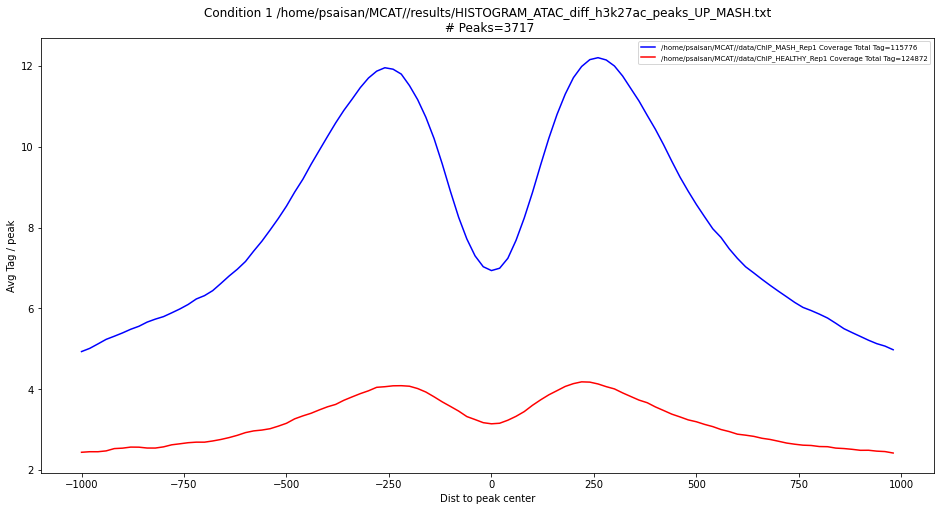

['#PeakID', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6']


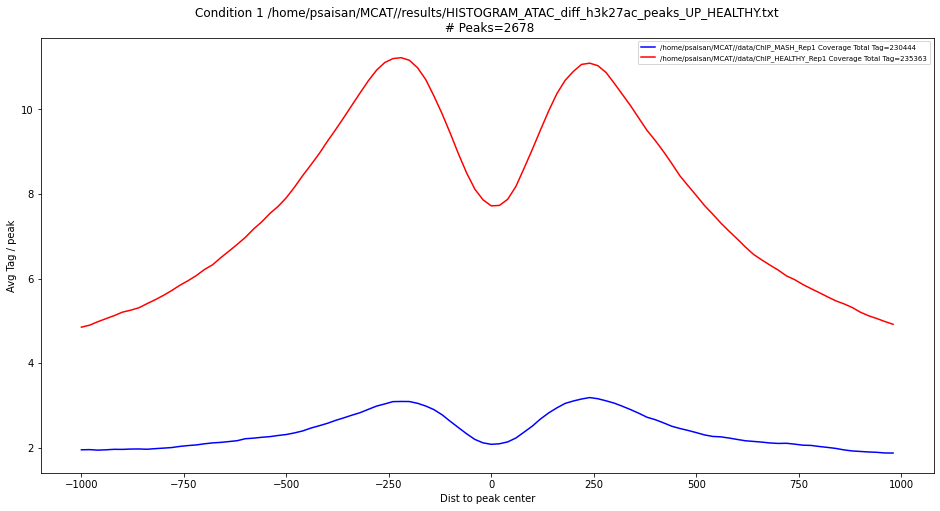

In [181]:
#PLOT H3K27AC Densities associated with last section's peak segments:
# 10
#############################


# Define the plotting function
def plot_hist(df, df2, Xbins_Col, KO_Col, WT_Col, H3K_out_file, title_prefix):
    # Extract xdata, ydata, zdata for plotting
    xdata = df.iloc[1:-1, Xbins_Col]
    xdata = pd.to_numeric(xdata, errors='coerce')
    ydata = df.iloc[1:-1, KO_Col]
    ydata = pd.to_numeric(ydata, errors='coerce')
    zdata = df.iloc[1:-1, WT_Col]
    zdata = pd.to_numeric(zdata, errors='coerce')
    
    # Create the plot
    plt.plot(xdata, ydata, 'b', label=df.iloc[0, KO_Col] + ' Total Tag=' + str(int(np.sum(pd.to_numeric(df2.iloc[:, 20])))))
    plt.plot(xdata, zdata, 'r', label=df.iloc[0, WT_Col] + ' Total Tag=' + str(int(np.sum(pd.to_numeric(df2.iloc[:, 19])))))

    # Add labels and title
    plt.xlabel('Dist to peak center')
    plt.ylabel('Avg Tag / peak')
    plt.title(f'{title_prefix} {H3K_out_file}\n # Peaks={str(len(df2))}')
    plt.legend(loc='upper right', fontsize=7)

# Main part to call the plotting function for two DataFrames


# Define variables for condition 2
H3K_peak_file = cond1_file
H3K_out_file= cond1_file_HIST
WT_Col = 1
KO_Col = 4
Xbins_Col = 0

# Read the data for cond1
df1 = readPeak(H3K_out_file);
df2 = readPeak(H3K_peak_file);
# Create the figure and plot the histograms
plt.figure(figsize=(16, 8))
plot_hist(df1, df2_1, Xbins_Col, KO_Col, WT_Col, H3K_out_file, "Condition 1")
plt.show()



# Define variables for condition 2
H3K_peak_file = cond2_file
H3K_out_file= cond2_file_HIST
WT_Col = 1
KO_Col = 4
Xbins_Col = 0

# Read the data for cond2
df1 = readPeak(H3K_out_file)
df2 = readPeak(H3K_peak_file)
# Create the figure and plot the histograms
plt.figure(figsize=(16, 8))
plot_hist(df1, df2, Xbins_Col, KO_Col, WT_Col, H3K_out_file, "Condition 1")
plt.show()